<a href="https://colab.research.google.com/github/audalsgh/20250804/blob/main/0804_day1_lab_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1 Lab: 칼만필터와 데이터 추적기법 (Kalman Filter and Data Tracking)
이 노트북은 자율주행 데이터 처리 강의의 첫 번째 실습입니다. 각 실습은 Python 표준 라이브러리, NumPy, matplotlib만 사용하며, 센서 데이터의 노이즈 보정과 융합을 다룹니다.


## Lab 1: 1D 칼만필터로 노이즈 위치 데이터 보정하기

**목표:**
- 노이즈가 섞인 1차원 위치 데이터를 Kalman Filter로 보정합니다.
- Python 표준 라이브러리만 사용합니다.

**단계:**
1. `random.gauss`로 노이즈가 있는 위치 데이터 10개를 생성하세요.
2. 칼만필터의 예측-갱신 과정을 코드로 구현하세요.
3. 보정된 최종 위치 추정값을 출력하세요.

**예상 출력:**
- 보정 전 위치 리스트, 보정 후 최종 추정값


In [3]:
# 1D 칼만필터 예제 (Python 표준 라이브러리)
import random

# Step 1: 노이즈가 있는 위치 데이터 10개 생성
true_position = 0  # 실제(이상적인) 위치값을 0으로 가정
measured_positions = [true_position + random.gauss(0, 1) for _ in range(10)]  # random.gauss(0, 1): 평균 0, 표준편차 1인 정규분포 노이즈
print('측정 위치:', measured_positions)

# Step 2: 칼만필터 초기값 설정
estimate = 0
estimate_error = 1  # 추정 오차 공분산(P): 추정값이 실제와 얼마나 차이날지의 분산
measurement_error = 1  # 측정 오차 공분산(R): 센서 관측값의 분산

# Step 3: 센서 측정값 z에 대해 "예측-갱신" 반복
for z in measured_positions:
    # 칼만 이득 계산 K = P k−1 / (P k-1 + R)
    # 칼만 이득값이 작을수록 측정보다 추정(모델)을 더 신뢰, 클수록 측정을 더 신뢰
    K = estimate_error / (estimate_error + measurement_error)

    # 추정값 갱신 = 기존 추정값 + K*(예측 오차)
    # (예측 오차) = (측정값 z - 추정값 estimate)
    # 오차를 K만큼 반영하여 추정값을 갱신하는것.
    estimate = estimate + K * (z - estimate)
    # (선택) estimate_error 업데이트 생략 가능

print('최종 추정값:', estimate)

측정 위치: [-0.004152214713538233, -0.15670166775178934, 0.4983500993440628, -1.48079752789265, 2.1244358387623814, 0.3520445662885797, -1.4897351743753593, 0.2074812218195069, -1.0584447827866796, 0.2830170453814083]
최종 추정값: -0.1560124294529145


## Lab 2: 센서 융합 (GPS + IMU) 가중 평균 실습

**목표:**
- GPS와 IMU(속도계) 데이터를 가중 평균으로 융합하여 더 정확한 위치를 추정합니다.
- Python 표준 라이브러리만 사용합니다.

**단계:**
1. `random.gauss`로 GPS 위치 데이터 10개, IMU 위치 데이터 10개를 각각 생성하세요.
2. 두 센서의 신뢰도를 다르게 설정하고(예: GPS: 0.6, IMU: 0.4), 가중 평균으로 융합하세요.
3. 융합 결과 리스트를 출력하세요.

**예상 출력:**
- GPS, IMU, 융합 위치 리스트

In [1]:
# 센서 융합 (GPS + IMU) 가중 평균 예제
import random

# Step 1: GPS, IMU 위치 데이터 10개씩 생성
true_position = 0  # 실제(이상적인) 위치값을 0으로 가정
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]  # 평균 0, 표준편차 1인 정규분포 노이즈
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]  # 평균 0, 표준편차 1인 정규분포 노이즈

# Step 2: 신뢰도(가중치) 설정
w_gps = 0.6
w_imu = 0.4

# Step 3: 가중 평균 융합, gps와 imu모두 가중치를 곱하여 합친다.
# 파이썬의 리스트 컴프리헨션(List Comprehension) 문법으로, 10개짜리 리스트를 생성했다.
fused_positions = [
    w_gps * gps_positions[i] + w_imu * imu_positions[i]
    for i in range(10)
]

print('GPS:', gps_positions)
print('IMU:', imu_positions)
print('융합:', fused_positions)

GPS: [-1.578536390847015, 1.8701544926423366, 0.35294788504168834, -0.5138306149904311, -2.1887968939264364, -0.4202189179005092, -0.8127941685106921, -0.1682128932913033, 0.05019306645285617, -0.7362798483473014]
IMU: [1.1685175429116348, 1.2887020194306091, -1.1145584271526727, 0.8875709724650335, 3.5926757541012386, 2.4689013384482856, -0.14956700057498112, 2.051560369884163, -3.000983863333071, -0.37653234238220107]
융합: [-0.4797148173435549, 1.6375735033576455, -0.2340546398360561, 0.046730019991754745, 0.12379216528463366, 0.7354291846390089, -0.5475033013364077, 0.7196964119788833, -1.1702777054615148, -0.5923808459612613]


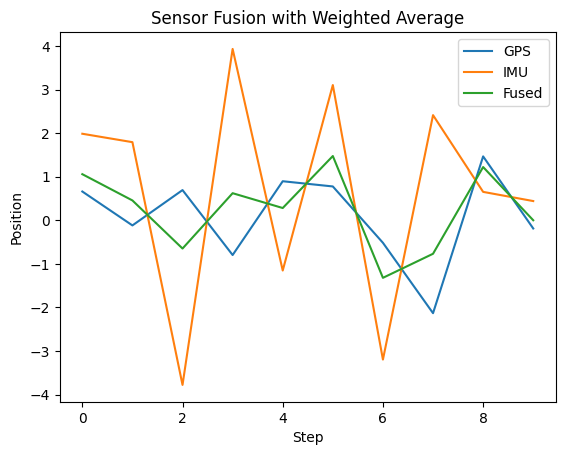

In [12]:
# 센서 융합 (GPS + IMU) 가중 평균 예제
import random
import matplotlib.pyplot as plt

# Step 1: GPS, IMU 위치 데이터 생성
true_position = 0
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]

# Step 2: 신뢰도(가중치) 설정
w_gps = 0.7
w_imu = 0.3

# Step 3: 가중 평균 융합
fused_positions = [
    w_gps * gps_positions[i] + w_imu * imu_positions[i]
    for i in range(10)
]

# Step 4: 시각화
plt.plot(gps_positions, label='GPS')
plt.plot(imu_positions, label='IMU')
plt.plot(fused_positions, label='Fused')
plt.legend()
plt.title('Sensor Fusion with Weighted Average')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

## Lab 3: CSV 데이터에 칼만필터 적용 및 시각화

**목표:**
- CSV 파일(또는 생성된 데이터)에서 위치 데이터를 불러와 칼만필터로 보정하고, 결과를 시각화합니다.
- Python 표준 라이브러리, NumPy, matplotlib 사용

**단계:**
1. (선택) CSV 파일이 없으면 `random.gauss`로 데이터 생성
2. 칼만필터로 보정된 위치 계산
3. matplotlib으로 원본 vs. 보정 데이터 플롯

**예상 출력:**
- 원본/보정 위치 리스트, 플롯 이미지

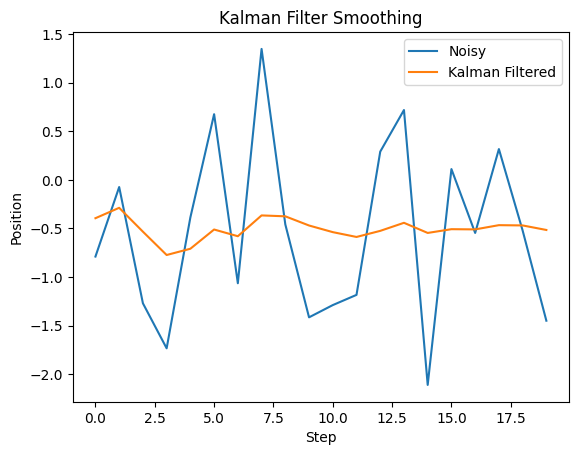

In [19]:
# 칼만필터로 CSV(또는 생성) 데이터 보정 및 시각화
import random
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 데이터 불러오기 또는 20개 생성
try:
    import pandas as pd
    data = pd.read_csv('positions.csv')
    measured_positions = data['position'].tolist()
except Exception:
    measured_positions = [random.gauss(0, 1) for _ in range(20)]  # 측정값은 그냥 가우시안 노이즈를 적용시켜 쓸것.

# Step 2: 칼만필터 적용
estimate = 0
estimate_error = 1  # 추정 오차 공분산(P): 추정값이 실제와 얼마나 차이날지의 분산
measurement_error = 1  # 측정 오차 공분산(R): 센서 관측값의 분산
estimates = []

# 칼만필터는 이 3줄이 반복되는게 핵심이고, 전부.
for z in measured_positions:
    K = estimate_error / (estimate_error + measurement_error)
    estimate = estimate + K*(z - estimate)
    estimate_error = (1 - K) * estimate_error  # 추정 오차 공분산(P) 갱신.
    estimates.append(estimate)  # 루프마다 갱신된 estimate 값을 리스트에 담기.

# Step 3: 시각화
plt.plot(measured_positions, label='Noisy')
plt.plot(estimates, label='Kalman Filtered')
plt.legend()
plt.title('Kalman Filter Smoothing')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

---

### 오늘의 실습 정리
- 칼만필터로 노이즈 데이터 보정, 센서 융합, 시각화까지 경험했습니다.
- Colab에서 결과(플롯, 수치)를 저장해 제출하세요.
- 질문은 강의 포럼/이메일로!
